# Test to print 3D-function for sphere:

In [ ]:
%matplotlib notebook
from cost_function import sphere_grid
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 30)
y = np.linspace(-5, 5, 30)

X, Y = np.meshgrid(x, y)

a = X.reshape(X.shape[0]*X.shape[1], 1)
b = Y.reshape(Y.shape[0]*Y.shape[1], 1)
values = np.concatenate((a, b), axis=1)
Z = (sphere_grid(values)).reshape((len(Y), len(X)))

# 3D-graph
fig = plt.figure('sphere')
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 100, cmap='binary')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='coolwarm')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# contour
fig = plt.figure('curve-set')
plt.contour(X, Y, Z, levels=10)

# Test to print 3D-function for ackley:

In [ ]:
%matplotlib notebook
import numpy as np
from cost_function import ackley_grid
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)

X, Y = np.meshgrid(x, y)

a = X.reshape(X.shape[0]*X.shape[1], 1)
b = Y.reshape(Y.shape[0]*Y.shape[1], 1)
values = np.concatenate((a, b), axis=1)
Z = ackley_grid(values).reshape((len(Y), len(X)))

# 3-D graph
fig = plt.figure('ackley')
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 100, cmap='binary')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='coolwarm')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# contour
fig = plt.figure('curve-set')
plt.contour(X, Y, Z, levels=20)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


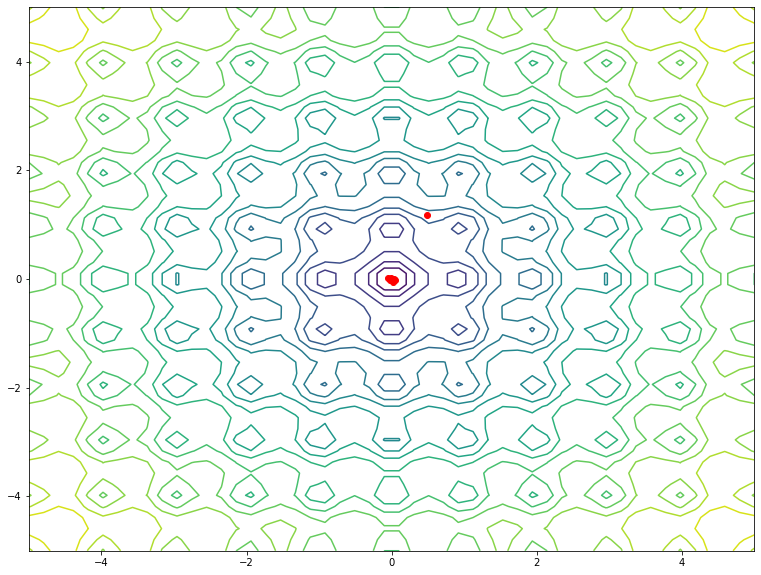

In [6]:
import numpy as np
import time
from swarm import Swarm
from cost_function import ackley, ackley_grid
import matplotlib.pyplot as plt

def compute_coefficients(iter, num_iter):
    t, n = iter, num_iter
    w = (0.4 / n**2) * (t - n) ** 2 + 0.4
    c1 = -3 * t / n + 3.5
    c2 = 3 * t / n + 0.5

    return w, c1, c2
# end

###############################################################
x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)

X, Y = np.meshgrid(x, y)

a = X.reshape(X.shape[0]*X.shape[1], 1)
b = Y.reshape(Y.shape[0]*Y.shape[1], 1)
values = np.concatenate((a, b), axis=1)
Z = ackley_grid(values).reshape((len(Y), len(X)))
############################################################à

num_iterations = 50
num_particles = 30
bounds = np.array([[-5, +5], [-5, +5]])

fitness_func = ackley

fig = plt.figure('curve-set')
plt.ylim(-5,+5)
plt.xlim(-5,+5)
fig.set_size_inches(13, 10)
abx = plt.axes(projection='rectilinear')
plt.contour(X, Y, Z, levels=20)

my_swarm = Swarm(num_particles, bounds)  # initial population
my_swarm.find_global_best(fitness_func)  # set global best for swarm

# print state
positions = my_swarm.get_particles_position()
pos = abx.scatter(positions[:, 0], positions[:, 1], marker='o', c='r')

for k in range(0, num_iterations):
    
    # clear state
    pos.remove()
    
    # coefficients policy
    inertial, cognitive, social = compute_coefficients(k, num_iterations)

    # move swarm
    my_swarm.move(inertial, cognitive, social)

    # evaluate local_best for swarm
    my_swarm.compute_local_best(fitness_func)

    # evaluate global_best for swarm
    my_swarm.find_global_best(fitness_func)
    
    # state
    positions = my_swarm.get_particles_position()
    pos = abx.scatter(positions[:, 0], positions[:, 1], marker='o', c='r')
    num = str(k)
    fig.savefig('/plots/'+num+'.png')
# end





<img src="pso.gif" align=center>

In [ ]:
from os import listdir
import imageio

images = []
for filename in listdir("/plots"):
    images.append(imageio.imread(filename))
imageio.mimsave("/src/pso.gif", images)